# Deep Learning Project

__Domain: Considering the "Patent application analysis" as a domain of interest__

* A patent classification is a system for examiners of patent offices or other people to categorize documents, such as published patent applications, according to the technical features of their content.

* Patent classification make it feasible to search quickly for documents about earlier disclosures similar to or related to the invention for which a patent is applied for, and to track technological trends in patent applications.

__Load DataSet__

In [ ]:
import os
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import ParseError
import pandas as pd
from lxml import etree
import csv
from os import path

In [ ]:
def parseXML(xml_file_path):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        try: 
            tis = root.find('tis')
            title = tis.find('ti').text
            tis_lang = tis.find('ti')
            ti_lang = tis_lang.attrib

            abs = root.find('abs')
            abstract = abs.find('ab').text
            abs_lang = abs.find('ab')
            ab_lang = abs_lang.attrib

            cls = root.find('cls')
            claim = cls.find('cl').text
            cls_lang = cls.find('cl')
            cl_lang = cls_lang.attrib

            txts = root.find('txts')
            description = txts.find('txt').text
            txts_lang = txts.find('txt')
            desc_lang = txts_lang.attrib
            
            result = {
                'title':title,
                'ti_lang':ti_lang,
                'abstract':abstract,
                'ab_lang':ab_lang,
                'claim':claim,
                'cl_lang':cl_lang,
                'description':description,
                'desc_lang':desc_lang
            }
            return result
        
        except AttributeError as ae:
            print("Attribute error")
            pass
    except etree.XMLSyntaxError as e:
        pass
    
def write_to_csv1(title,abstract,claim,description,xml_file_path,label,wfile):
    df = pd.DataFrame(
    {
        "title":[title],
        "abstract":[abstract],
        "claim":[claim],
        "description":[description],
        "filepath":[xml_file_path],
        "label":[label]
    })
    try:
        df.to_csv(wfile, mode='a')
    except IOError:
        print("IOError")
        
def write_to_csv(title,abstract,claim,description,xml_file_path,label,wfile):
    try:
        with open(wfile,'a', newline='') as csvfile:
            headers = ['title','abstract','claim','description','filepath','label']
            writer = csv.DictWriter(csvfile, fieldnames=headers)
            writer.writerow({
            'title':title,
            'abstract':abstract,
            'claim':claim,
            'description':description,
            'filepath':xml_file_path,
            'label':label
            })
            csvfile.close()
    except csv.Error as e:
                print("File write error",e)


__create train and test csv file__
* check if train and test exist
* if yes exit if no create files

In [ ]:
def createFile():
    if path.exists('train.csv')==False:
        try:
            with open('train.csv', 'w') as csvfile:
                headers = ['title','abstract','claim','description','filepath','label']
                writer = csv.DictWriter(csvfile, fieldnames=headers)
                writer.writeheader()
        except csv.Error as e:
            print("train file error:",e)
    else:
        print('Train file already exist')

    if path.exists('test.csv')==False:
        try:
            with open('test.csv','w') as csvfile:
                headers = ['title','abstract','claim','description','filepath','label']
                writer = csv.DictWriter(csvfile, fieldnames=headers)
                writer.writeheader()
        except csv.Erro as e:
            print("test file error:",e)
    else:
        print('Test file already exist')
createFile()

In [ ]:
train_dir = "datasets/wipo-alpha/train/alphatrain-"
test_dir = "datasets/wipo-alpha/test/alphatest-"


labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for lb in labels:
    for setpath in [train_dir+lb,test_dir+lb]:
        for r,d,files in os.walk(setpath):
            for f in files:
                xml_file_path = os.path.join(r,f)
                try:
                    if (setpath == train_dir+lb):
                        wfile = "train.csv"
                        result = parseXML(xml_file_path)
                        lang = result['ti_lang']
                        xmllang = lang['{http://www.w3.org/XML/1998/namespace}lang']
                        if(xmllang == 'EN'):
                            print(xml_file_path)
                            write_to_csv(result['title'],
                                        result['abstract'],
                                        result['claim'],
                                        result['description'],
                                        xml_file_path,
                                        lb,
                                        wfile)
                    else:
                        wfile = "test.csv"
                        result = parseXML(xml_file_path)
                        lang = result['ti_lang']
                        xmllang = lang['{http://www.w3.org/XML/1998/namespace}lang']
                        if(xmllang == 'EN'):
                            print(xml_file_path)
                            write_to_csv(result['title'],
                                        result['abstract'],
                                        result['claim'],
                                        result['description'],
                                        xml_file_path,
                                        lb,
                                        wfile)  
                except Exception as e:
                    print(e)

datasets/wipo-alpha/train/alphatrain-A/A/22/C/013/US0028520_26042001.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/013/US9931206_13072000.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/013/GB9904418_13072000.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/013/GB0003295_22032001.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/013/US9904452_10091999.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/013/FI0200021_18072002.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/013/US9826468_24061999.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/009/NL0000660_22032001.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/009/US0102599_02082001.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/017/IS0100011_06122001.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/017/US0140559_25102001.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/017/US0005266_21092000.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/017/IT0000114_09112000.xml
datasets/wipo-alpha/train/alphatrain-A/A/22/C/021/N

# create  a small subset dataset
* __we will be working in a part of the datasets around(10000) samples__
* __From each label we will take 1300 datasets each, i.e. total datasets = 10400 samples__
* __For now we will just take the train_data and split it into train and test datasets__

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

In [ ]:
train_data.shape

(46318, 6)

In [ ]:
test_data.shape

(28924, 6)

Text(0, 0.5, 'Data Count')

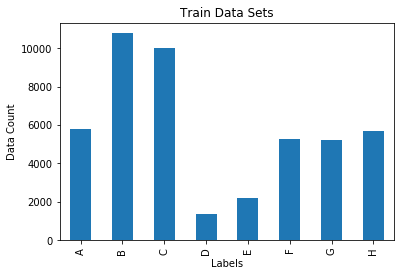

In [ ]:
train_data['label'].value_counts().sort_index().plot.bar()
plt.title('Train Data Sets')
plt.xlabel('Labels')
plt.ylabel('Data Count')

Text(0, 0.5, 'Data Count')

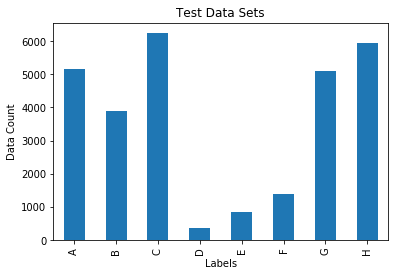

In [ ]:
test_data['label'].value_counts().sort_index().plot.bar()
plt.title('Test Data Sets')
plt.xlabel('Labels')
plt.ylabel('Data Count')

In [ ]:
new_dataset = pd.DataFrame()
for label in train_data['label'].unique():
    new_dataset = new_dataset.append(train_data[train_data['label']==label].sample(1300)) 

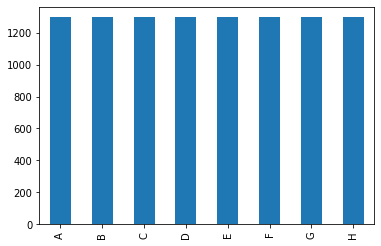

In [ ]:
new_dataset['label'].value_counts().sort_index().plot.bar()

In [ ]:
new_dataset.shape

(10400, 6)

In [ ]:
wipo_alpha_patent_dataset = shuffle(new_dataset)

In [ ]:
wipo_alpha_patent_dataset.head()

title  \
17358  SINGLE STAGE GYPSUM BED PROCESS FOR PRODUCING ...   
27915  APPARATUS FOR BINDING THREAD RUNNING THROUGH B...   
14310  A METHOD OF PRODUCING A COMPOSITE BODY BY COAL...   
35082                            GAS HEATING APPLIANCE\n   
30560    FLOW DIVIDER PROGRAMMED BY PRESSURIZING VALVE\n   

                                                abstract  \
17358  The invention relates to a single stage gypsum...   
27915  An apparatus for binding a button fixing threa...   
14310  A method of producing a composite body by coal...   
35082  The present invention relates to a gas burner ...   
30560  A combination pressurizing valve (27) and fuel...   

                                                   claim  \
17358  Claims\n1. A single-stage gypsum bed process f...   
27915   Claims\n1. An apparatus for winding a binding...   
14310   Claims\n1. A method of producing a composite ...   
35082  CLAIMS1. A gas burner comprising:\na body port...   
30560  WE CLAIM:\n1. A fuel control system for supply...   

                                             description  \
17358  Single-stage gypsum bed process for producing ...   
27915   APPARATUS FOR BINDING THREAD RUNNING THROUGH ...   
14310  A METHOD OF PRODUCING A COMPOSITE BODY BY COAL...   
35082   GAS S HEATING APPLIANCE\nTECHNICAL FIELD\nThi...   
30560   FLOW DIVIDER PROGRAMMED BY PRESSURIZING VALVE...   

                                                filepath label  
17358  datasets/wipo-alpha/train/alphatrain-C/C/01/D/...     C  
27915  datasets/wipo-alpha/train/alphatrain-D/D/05/B/...     D  
14310  datasets/wipo-alpha/train/alphatrain-B/B/21/J/...     B  
35082  datasets/wipo-alpha/train/alphatrain-F/F/24/C/...     F  
30560  datasets/wipo-alpha/train/alphatrain-F/F/02/C/...     F

__wipo_alpha_patent_dataset for patent data analysis__

In [ ]:
wipo_alpha_patent_dataset.to_csv('wipo_alpha_patent_dataset.csv')

# Pre - processing

__Load wipo alpha patent dataset__

In [ ]:
import pandas as pd
import re
import numpy as np

In [ ]:
wipo_data = pd.read_csv('wipo_alpha_patent_dataset.csv')

In [ ]:
wipo_data.head()

Unnamed: 0                                              title  \
0       17358  SINGLE STAGE GYPSUM BED PROCESS FOR PRODUCING ...   
1       27915  APPARATUS FOR BINDING THREAD RUNNING THROUGH B...   
2       14310  A METHOD OF PRODUCING A COMPOSITE BODY BY COAL...   
3       35082                            GAS HEATING APPLIANCE\n   
4       30560    FLOW DIVIDER PROGRAMMED BY PRESSURIZING VALVE\n   

                                            abstract  \
0  The invention relates to a single stage gypsum...   
1  An apparatus for binding a button fixing threa...   
2  A method of producing a composite body by coal...   
3  The present invention relates to a gas burner ...   
4  A combination pressurizing valve (27) and fuel...   

                                               claim  \
0  Claims\n1. A single-stage gypsum bed process f...   
1   Claims\n1. An apparatus for winding a binding...   
2   Claims\n1. A method of producing a composite ...   
3  CLAIMS1. A gas burner comprising:\na body port...   
4  WE CLAIM:\n1. A fuel control system for supply...   

                                         description  \
0  Single-stage gypsum bed process for producing ...   
1   APPARATUS FOR BINDING THREAD RUNNING THROUGH ...   
2  A METHOD OF PRODUCING A COMPOSITE BODY BY COAL...   
3   GAS S HEATING APPLIANCE\nTECHNICAL FIELD\nThi...   
4   FLOW DIVIDER PROGRAMMED BY PRESSURIZING VALVE...   

                                            filepath label  
0  datasets/wipo-alpha/train/alphatrain-C/C/01/D/...     C  
1  datasets/wipo-alpha/train/alphatrain-D/D/05/B/...     D  
2  datasets/wipo-alpha/train/alphatrain-B/B/21/J/...     B  
3  datasets/wipo-alpha/train/alphatrain-F/F/24/C/...     F  
4  datasets/wipo-alpha/train/alphatrain-F/F/02/C/...     F

In [ ]:
wipo_data.shape

(10400, 7)

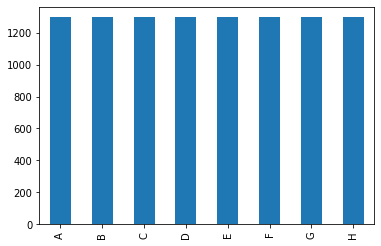

In [ ]:
wipo_data['label'].value_counts().sort_index().plot.bar()

__Concat the title, abstract, claim, description__

In [ ]:
wipo = pd.DataFrame()
wipo['text']  = wipo_data['title']+" "+wipo_data['abstract']+" "+wipo_data['claim']+" "+wipo_data['description']
wipo['label'] = wipo_data['label']

__Convert text to lower case__

In [ ]:
wipo['text']  = wipo['text'].str.lower()
wipo['label'] = wipo['label'].str.lower()

In [ ]:
wipo.head()

text label
0  single stage gypsum bed process for producing ...     c
1  apparatus for binding thread running through b...     d
2  a method of producing a composite body by coal...     b
3  gas heating appliance\n the present invention ...     f
4  flow divider programmed by pressurizing valve\...     f

__Remove punctuation__

In [ ]:
#remove all non alphabetic characters
regex_1 = re.compile(r'[^a-zA-Z]')
wipo['text'] = pd.Series(wipo['text']).str.replace(regex_1, ' ')
wipo['label'] = pd.Series(wipo['label']).str.replace(regex_1,' ')

#reduce multi-space to single space
regex_2 = re.compile(r' +')
wipo['text'] = pd.Series(wipo['text']).str.replace(regex_2,' ')
wipo['label'] =  pd.Series(wipo['label']).str.replace(regex_2,' ')

__Preprocessed and ready to use dataset of wipo-alpha__

In [ ]:
wipo.to_csv('wipo_alpha.csv',index=False)